# Hierarchical Probabilistic Count Matrix Factorization

In [2]:
%matplotlib inline

import pCMF.models.hpcmf as hpcmf
import pCMF.models.pcmf as pcmf
from pCMF.misc import utils, plot_utils

import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

from scipy.stats import gamma

import operator
import seaborn as sns
sns.set_style('whitegrid')

In [ ]:
# Experiment parameters
N = 1000 # number of observations
P = 10 # observation space dimensionality
K = 2 # latent space dimensionality
C = 2 # number of clusters

# Generate data set
z_p = 0.5
eps = 5.
Y, D, X, R, V, U, clusters = utils.generate_data(N, P, K, C=C, zero_prob=z_p, 
                                                 eps=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2)

In [25]:
# Experiment parameters
N = 1000 # number of observations
P = 20 # observation space dimensionality
K = 10 # latent space dimensionality
C = 3 # number of clusters

# Generate data set
z_p = 0.3
eps = 2.
Y, D, X, R, V, U, clusters = utils.generate_sparse_data(N, P, K, C=C, zero_prob=z_p, noisy_prop=0.5,
                                                 eps_U=eps, return_all=True)

Y_train, Y_test, U_train, U_test, c_train, c_test = train_test_split(Y, U.T, clusters, test_size=0.2, random_state=42)

In [26]:
T = 60.
S = 1.

In [33]:
# Run PCA
pca_U = PCA(n_components=K).fit_transform(np.log(Y_train + 1))
pca_pca = PCA(n_components=2).fit_transform(pca_U)

In [34]:
# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('PCMF:')
inf = pcmf.cavi.CoordinateAscentVI(Y_train, alpha, beta, pi)
pcmf_ll = inf.run_cavi(n_iterations=4000, empirical_bayes=True, return_ll=True, sampling_rate=S, max_time=T)
pcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation
pcmf_V = inf.estimate_V(inf.b)

pcmf_pca = PCA(n_components=2).fit_transform(pcmf_U)

PCMF:
Iteration 57/4000. Log-likelihood: 95.735. Elapsed: 61 secondss


In [35]:
# Run CAVI and get estimates (hpCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('HPCMF:')
inf = hpcmf.cavi_hpcmf.CoordinateAscentVI(Y_train, alpha, beta, pi)
hpcmf_ll = inf.run_cavi(n_iterations=4000, return_ll=True, sampling_rate=S, max_time=T)
hpcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation
hpcmf_V = inf.estimate_V(inf.b)

hpcmf_pca = PCA(n_components=2).fit_transform(hpcmf_U)

HPCMF:


In [ ]:
# Run PCA
pca_U = PCA(n_components=2).fit_transform(Y_train)

# Run CAVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('PCMF:')
inf = cavi_new.CoordinateAscentVI(Y_train, alpha, beta, pi)
pcmf_ll = inf.run_cavi(n_iterations=4000, empirical_bayes=True, return_ll=True, sampling_rate=S, max_time=T)
pcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation

print('\n')

# Run SVI and get estimates (pCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('SPCMF:')
inf = svi_new.StochasticVI(Y_train, alpha, beta, pi)
spcmf_ll = inf.run_svi(n_iterations=4000, minibatch_size=100, empirical_bayes=True, return_ll=True, sampling_rate=S, max_time=T)
spcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation

print('\n')

# Run CAVI and get estimates (hpCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('HPCMF:')
inf = cavi_hpcmf.CoordinateAscentVI(Y_train, alpha, beta, pi)
hpcmf_ll = inf.run_cavi(n_iterations=4000, return_ll=True, sampling_rate=S, max_time=T)
hpcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation

print('\n')

# Run SVI and get estimates (hpCMF)
alpha = np.ones((2, K))
alpha[0, :] = 3.
alpha[1, :] = 0.5
beta = np.ones((2, P, K))
pi = np.ones((P,)) * 0.5
print('SHPCMF:')
inf = svi_hpcmf.StochasticVI(Y_train, alpha, beta, pi)
shpcmf_ll = inf.run_svi(n_iterations=4000, minibatch_size=100, return_ll=True, sampling_rate=S, max_time=T)
shpcmf_U = inf.a[0] / inf.a[1] # VI estimate is the mean of the variational approximation

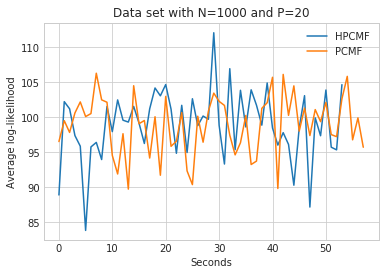

In [36]:
#plt.plot(shpcmf_ll[1], label='SHPCMF')
plt.plot(hpcmf_ll[1], label='HPCMF')
plt.plot(pcmf_ll[1], label='PCMF')
#plt.plot(spcmf_ll[1], label='SPCMF')
plt.ylabel('Average log-likelihood')
plt.xlabel('Seconds')
plt.title('Data set with N={} and P={}'.format(N, P))
plt.legend()
plt.show()

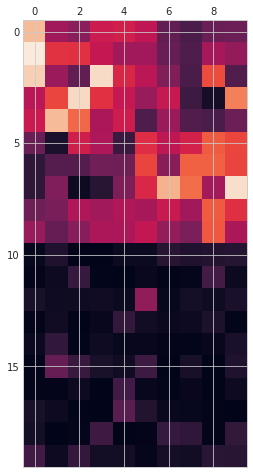

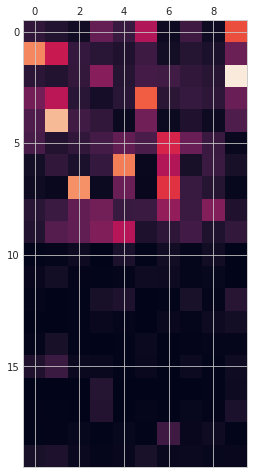

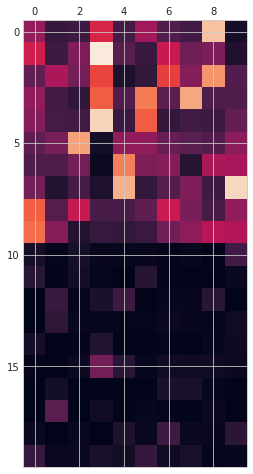

In [37]:
plt.matshow(V)
plt.show()

plt.matshow(pcmf_V)
plt.show()

plt.matshow(hpcmf_V)
plt.show()

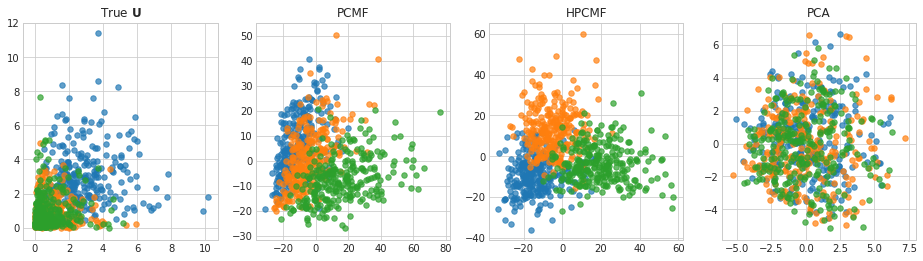

In [38]:
U_list = [U_train, pcmf_pca, hpcmf_pca, pca_pca]
title_list = ['True $\mathbf{U}$', 'PCMF', 'HPCMF', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 4))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(1, n_results, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[i][c_train==c, 0], U_list[i][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(title_list[i])
plt.show()

In [40]:
pcmf_silh = silhouette_score(pcmf_U, c_train)
hpcmf_silh = silhouette_score(hpcmf_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'PCMF': pcmf_silh, 'PCA': pca_silh, 'HPCMF': hpcmf_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('1.\033[1m {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
i = 2
for score_tp in sorted_scores[1:]:
    print('{0}. {1}: {2:.3}'.format(i, score_tp[0], score_tp[1]))
    i += 1

Silhouette scores (higher is better):
1. HPCMF: 0.14
2. PCMF: 0.124
3. PCA: -0.00498


In [ ]:
U_list = [U_train, pcmf_U, spcmf_U, hpcmf_U, shpcmf_U, pca_U]
title_list = ['True $\mathbf{U}$', 'PCMF', 'SPCMF', 'HPCMF', 'SHPCMF', 'PCA']

n_results = len(U_list)

assert len(U_list) == len(title_list)

fig = plt.figure(figsize=(16, 10))

s = 30
alpha = 0.7
labels=None
for i in range(len(U_list)):
    ax = plt.subplot(2, n_results/2, i+1)
    handlers = []
    for c in range(C):
        h = ax.scatter(U_list[i][c_train==c, 0], U_list[i][c_train==c, 1], s=s, alpha=alpha)
        handlers.append(h)
    if labels is not None:
        ax.legend(handlers, labels, scatterpoints=1)
    plt.title(title_list[i])
plt.show()

In [ ]:
true_silh = silhouette_score(U_train, c_train)
pcmf_silh = silhouette_score(pcmf_U, c_train)
spcmf_silh = silhouette_score(spcmf_U, c_train)
hpcmf_silh = silhouette_score(hpcmf_U, c_train)
shpcmf_silh = silhouette_score(shpcmf_U, c_train)
pca_silh = silhouette_score(pca_U, c_train)

scores = {'SPCMF': spcmf_silh, 'PCMF': pcmf_silh, 'PCA': pca_silh, 'HPCMF': hpcmf_silh, 'SHPCMF': shpcmf_silh}

sorted_scores = sorted(scores.items(), key=operator.itemgetter(1), reverse=True)

print('Silhouette scores (higher is better):')
print('1.\033[1m {0}: {1:.3}\033[0m'.format(sorted_scores[0][0], sorted_scores[0][1]))
i = 2
for score_tp in sorted_scores[1:]:
    print('{0}. {1}: {2:.3}'.format(i, score_tp[0], score_tp[1]))
    i += 1
    
print('\nSilhouette of true U:')
print('%0.3f' % true_silh)